In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

The above imports are the default imports for any new Qiskit Notebook in IBM Quantum Experience.

* QuantumCircuit: Holds all your quantum operations; the instructions for the quantum system
* Aer: Handles simulator backends
* execute: Runs your circuit
* qiskit.visualization: Enables data visualization, such as plot_histogram
* IBMQ: IBM Quantum Experience



Total count for 00 and 11 are: {'00': 50119, '11': 49881}


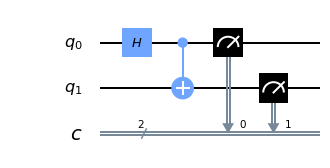

In [2]:
# Build
#------

# QuantumCircuit: Holds all your quantum operations; 
# the instructions for the quantum system
# Create a Quantum Circuit acting on the q register
# initialize two qubits in the zero state, 
# and two classical bits in the zero state, 
# in the quantum circuit called circuit
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
# gates that manipulate the qubits in your circuit

# QuantumCircuit.h(0): A Hadamard gate on qubit 0, 
# which puts it into a superposition state
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
# QuantumCircuit.cx(0, 1): A controlled-NOT operation ( ) 
# on control qubit 0 and target qubit 1, 
# putting the qubits in an entangled state
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
# QuantumCircuit.measure([0,1], [0,1]): The first argument indexes the qubits, 
# the second argument indexes the classical bits. 
# The nth qubit’s measurement result will be stored in the nth classical bit.
circuit.measure([0,1], [0,1])

# Execute
#--------

# Use Aer's qasm_simulator
# Aer: Handles simulator backends
# Each run of this circuit will yield either the bit string '00' or '11'
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
# execute: Runs your circuit
job = execute(circuit, simulator, shots=100000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Analyze
#--------

# Draw the circuit
circuit.draw()

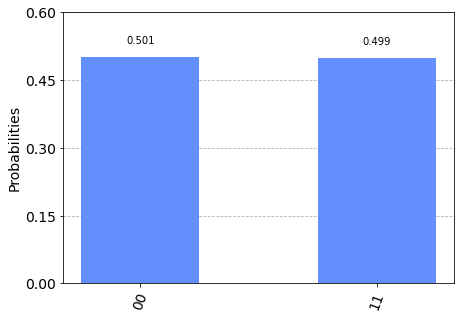

In [3]:
# Analyze
#--------

# Plot a histogram
plot_histogram(counts)

The probabilities (relative frequencies) of observing the and states are computed by taking the respective counts and dividing by the total number of shots.